In [3]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [4]:
# 설치가 안되어 있는 경우
# !pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=6351fa2ecb074494c8f659d0c57131b89d2509bee4ccaed39a4a45a14f025f58
  Stored in directory: /Users/home/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [6]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)



dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [10]:
# dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 
# 'target_names', 'DESCR', 'details', 'url'])
mnist.keys()
mnist['target'][3]

'1'

In [11]:
mnist.target = mnist.target.astype(np.int8)

In [15]:
x = mnist.data / 255 # 0 ~ 255 값을 [0,1] 구간으로 정규화
y = mnist.target


image target name : 5


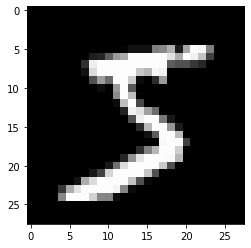

In [17]:
plt.imshow(x[0].reshape(28,28), cmap='gray')
print("image target name : {:.0f}".format(y[0]))

In [23]:
import torch 
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# 데이터 나누기 
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=1/7, 
                                                  random_state=0)

print(len(x_train))
print(len(x_val))
print(len(y_train))
print(len(y_val))


# 데이터 텐서화 
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
x_val = torch.Tensor(x_val)
y_val = torch.Tensor(y_val)

# data set
train_set = TensorDataset(x_train, y_train)
val_set = TensorDataset(x_val, y_val)

# data loader
loader_train = DataLoader(train_set, batch_size = 64, shuffle=True)
loader_val = DataLoader(val_set, batch_size = 64, shuffle=False)



60000
10000
60000
10000


In [26]:
# 다층 퍼셉트론 구현 
from torch import nn 
from torch import optim
model = nn.Sequential()
model.add_module("fc1", nn.Linear(28 * 28 * 1, 100))
model.add_module("relu1", nn.ReLU())
model.add_module("fc2", nn.Linear(100, 100))
model.add_module("relu2", nn.ReLU())
model.add_module("fc3", nn.Linear(100, 100))


# 오차 함수 
loss_fn = nn.CrossEntropyLoss()

# optimizer 
opimizer = optim.Adam(model.parameters(), lr=0.001)




In [34]:
# train loop
def train(epoch):
    # 신경망을 학습 모드로 전환 
    model.train()
    
    # DataLoader 에서 미니배치를 하나씩 꺼내 학습을 수행 
    for data, targets in loader_train:
        
        # opimizer zero 
        opimizer.zero_grad()
        output = model(data)
        
        # 출력과 훈련 데이터 정답간의 오차를 계산 
        loss = loss_fn(output, targets.long())
        loss.backward() # 오차를 역전파 계산
        opimizer.step() # backward 계산한 값으로 가중치를 수정 
    print(f"epoch {epoch} : 완료\n")
    

def test():
    # 신경망을 추론 모드로 전환
    model.eval()
    correct = 0
    
    # 데이터로더에서 데이터를 꺼내 추론 실행
    with torch.no_grad(): # 추론 과정에는 미분이 필요 없음 ... 
        for data, targets in loader_val :
            
            output = model(data) # 데이터를 입력하고 출력을 계산
            
            # 추론 
            # 확률이 가장 높은 레이블이 무엇인지 계산 
            _, pred = torch.max(output.data, 1)
            # 정답과 일치한 경우 정답 카운트 증가
            correct += pred.eq(targets.data.view_as(pred)).sum()
    data_num = len(loader_val.dataset) # data 총 건수 
    print("\n테스트 데이터에서 예측 정확도 : {}/{} ({:.0f}%)\n".format(correct, 
                                                          data_num , 100. * correct / data_num))

In [35]:
test()


테스트 데이터에서 예측 정확도 : 24/10000 (0%)



In [36]:
for epoch in range(10):
    train(epoch)
    
test()

epoch 0 : 완료

epoch 1 : 완료

epoch 2 : 완료

epoch 3 : 완료

epoch 4 : 완료

epoch 5 : 완료

epoch 6 : 완료

epoch 7 : 완료

epoch 8 : 완료

epoch 9 : 완료


테스트 데이터에서 예측 정확도 : 9722/10000 (97%)



예측 결과 : 1
이 이미지 데이터의 정답 레이블은 1입니다.


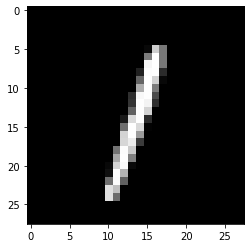

In [44]:
# 추론 
index = 1000

model.eval() # 추론 모드 변경 
data = x_val[index]

output = model(data)
_, pred = torch.max(output.data, 0)


print(f"예측 결과 : {pred}")

x_val_show = (x_val[index]).numpy()
plt.imshow(x_val_show.reshape(28,28), cmap='gray')

print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다.".format(y_val[index]))
